# Phase 2 Project: Analyzing Movie Trends: What Films Perform Best at the Box Office?

# Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Introduction

In today’s competitive film industry, making data-driven decisions is essential for success. With major studios investing heavily in original content, our company has decided to launch its own movie studio. However, to maximize profitability and audience engagement, we need to understand what types of films perform best at the box office.

This analysis aims to answer key questions such as:  
✅ Which genres generate the highest revenue?  
✅ How do production budgets impact profitability?  
✅ What trends exist in audience preferences over time?  
✅ How does critical reception correlate with box office performance?  

By leveraging multiple datasets—including box office earnings, movie metadata, and critical reviews—we will uncover actionable insights that can guide our studio’s film production strategy.

# Data Sources

We will analyze and combine data from the following sources:  
📊 Movie Budgets & Revenue – Production budgets, domestic & worldwide gross earnings: `tn.movie_budgets.csv.gz`   
🎬 Movie Metadata – Genre, language, popularity, and ratings: `im.db`  

# Approach

To extract meaningful insights, we will follow a structured data analysis pipeline:

1️⃣ **Data Cleaning & Preprocessing**  
- Load and inspect each dataset for missing values, duplicates, and inconsistencies  
- Standardize formats (e.g., merging different date formats, handling null values)  

2️⃣ **Data Merging & Integration**  
- Use unique identifiers (such as movie IDs or titles) to merge datasets  
- Align relevant features from the different sources to create a comprehensive dataset  

3️⃣ **Exploratory Data Analysis (EDA)**  
- Identify trends in budget vs. revenue  
- Analyze genre popularity and profitability  
- Perform statistical tests for further analysis  

4️⃣ **Insights & Recommendations**  
- Summarize findings to determine the most viable film genres and budget ranges  
- Provide data-driven suggestions on key success factors for the new movie studio  

Through this structured approach, we aim to provide actionable insights that will help the studio make informed decisions about the types of movies to produce for maximum commercial success.

# 1. Data Cleaning & Preprocessing

Importing necessary libraries

In [1]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import sqlite3

Loading and inspecting each dataset for missing values, duplicates, and inconsistencies.

In [2]:
# Load csv file
budgets = pd.read_csv('tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Establish connection
conn = sqlite3.connect('im.db')

# Load tabled into pandas df
moviebasics = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
moviebasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
# load data from movie_ratings
conn = sqlite3.connect('im.db')
movieratings = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
movieratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
# Merge the two datasets on movie_id
imdb_merge = pd.merge(moviebasics, movieratings, on="movie_id", how="inner")
# Close the database connection
conn.close()

In [6]:
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [7]:
imdb_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [8]:
#checking for duplicates
print(imdb_merge.duplicated().sum())
print(budgets.duplicated().sum())

# we have no duplicates in the data set

0
0


In [9]:
#assessing the percentage of missing values

imdb_merge.isna().mean()*100

#percentage is low and the missing values will have a minimal effect on our data preparation so we will continue as is

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

In [10]:
budgets.info() #there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We are going into standardising formats to make it easier to prepare for merging and analysis of the two datasets created above:

In [11]:
# Budget and revenue columns to numeric
cols_to_convert = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols_to_convert:
    budgets[col] = budgets[col].replace(r'[\$,]', '', regex=True).astype(float)

In [12]:
# Date converted to DateTime format
budgets["release_date"] = pd.to_datetime(budgets["release_date"])
budgets["year"] = budgets["release_date"].dt.year

# 2. Data Merging & Integration

We will use common keys to merge the data then align the different elemts to have a cohesive dataset

In [13]:
# Convert titles to lowercase and strip spaces for better matching
budgets["movie"] = budgets["movie"].str.lower().str.strip()
imdb_merge["primary_title"] = imdb_merge["primary_title"].str.lower().str.strip()

In [14]:
movies_merged = pd.merge(imdb_merge, budgets, left_on="primary_title", right_on="movie", how="inner")
movies_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,foodfight!,45000000.0,0.0,73706.0,2012
1,tt0326592,the overnight,The Overnight,2010,88.0,None,7.5,24,21,2015-06-19,the overnight,200000.0,1109808.0,1165996.0,2015
2,tt0337692,on the road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,on the road,25000000.0,720828.0,9313302.0,2013
3,tt0359950,the secret life of walter mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,the secret life of walter mitty,91000000.0,58236838.0,187861183.0,2013
4,tt0365907,a walk among the tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,2014-09-19,a walk among the tombstones,28000000.0,26017685.0,62108587.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,tt9746500,earth,Erde,2019,115.0,Documentary,7.3,49,36,2009-04-22,earth,47000000.0,32011576.0,116773317.0,2009
2931,tt9851050,sisters,Sisters,2019,NaN,"Action,Drama",4.7,14,57,2015-12-18,sisters,30000000.0,87044645.0,106030660.0,2015
2932,tt9861522,ali,Ali,2019,110.0,Drama,7.7,79,45,2001-12-25,ali,109000000.0,58183966.0,87683966.0,2001
2933,tt9899880,columbus,Columbus,2018,85.0,Comedy,5.8,5,93,2017-08-04,columbus,700000.0,1017107.0,1110511.0,2017


In [15]:
#inspecting the data
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935 entries, 0 to 2934
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2935 non-null   object        
 1   primary_title      2935 non-null   object        
 2   original_title     2935 non-null   object        
 3   start_year         2935 non-null   int64         
 4   runtime_minutes    2816 non-null   float64       
 5   genres             2927 non-null   object        
 6   averagerating      2935 non-null   float64       
 7   numvotes           2935 non-null   int64         
 8   id                 2935 non-null   int64         
 9   release_date       2935 non-null   datetime64[ns]
 10  movie              2935 non-null   object        
 11  production_budget  2935 non-null   float64       
 12  domestic_gross     2935 non-null   float64       
 13  worldwide_gross    2935 non-null   float64       
 14  year    

In [16]:
# Check for missing values
print(movies_merged.isna().mean()*100)

#percentage of missing values is not significant to our analysis

movie_id             0.000000
primary_title        0.000000
original_title       0.000000
start_year           0.000000
runtime_minutes      4.054514
genres               0.272572
averagerating        0.000000
numvotes             0.000000
id                   0.000000
release_date         0.000000
movie                0.000000
production_budget    0.000000
domestic_gross       0.000000
worldwide_gross      0.000000
year                 0.000000
dtype: float64


In [17]:
#dropping columns that will not be used for out analysis
movies_merged.drop(columns=['original_title', 'id', 'movie'], inplace=True)
movies_merged

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2012-12-31,45000000.0,0.0,73706.0,2012
1,tt0326592,the overnight,2010,88.0,None,7.5,24,2015-06-19,200000.0,1109808.0,1165996.0,2015
2,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,2013-03-22,25000000.0,720828.0,9313302.0,2013
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0,2013
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,2014-09-19,28000000.0,26017685.0,62108587.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
2930,tt9746500,earth,2019,115.0,Documentary,7.3,49,2009-04-22,47000000.0,32011576.0,116773317.0,2009
2931,tt9851050,sisters,2019,NaN,"Action,Drama",4.7,14,2015-12-18,30000000.0,87044645.0,106030660.0,2015
2932,tt9861522,ali,2019,110.0,Drama,7.7,79,2001-12-25,109000000.0,58183966.0,87683966.0,2001
2933,tt9899880,columbus,2018,85.0,Comedy,5.8,5,2017-08-04,700000.0,1017107.0,1110511.0,2017


In [18]:
# moves to statistical analysis

movies_merged.describe()


,start_year,runtime_minutes,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,year
count,2935.000000,2816.00000,2935.000000,2.935000e+03,2935,2.935000e+03,2.935000e+03,2.935000e+03,2935.000000
mean,2013.930494,102.96804,6.249574,6.619555e+04,2010-11-13 10:54:59.488926464,3.419822e+07,4.283240e+07,1.021183e+08,2010.330153
min,2010.000000,3.00000,1.600000,5.000000e+00,1915-02-08 00:00:00,1.400000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,2012.000000,90.00000,5.600000,1.490000e+02,2010-05-14 00:00:00,5.000000e+06,4.963625e+05,2.276072e+06,2010.000000
50%,2014.000000,101.00000,6.400000,8.092000e+03,2013-04-26 00:00:00,1.700000e+07,1.653500e+07,3.008706e+07,2013.000000
75%,2016.000000,113.00000,7.100000,7.508100e+04,2015-10-30 00:00:00,4.000000e+07,5.175675e+07,1.011341e+08,2015.000000
max,2019.000000,280.00000,9.300000,1.841066e+06,2019-12-31 00:00:00,4.250000e+08,7.605076e+08,2.776345e+09,2019.000000
std,2.559038,20.70868,1.183406,1.335852e+05,NaN,4.756961e+07,7.408148e+07,2.022345e+08,9.260472


# Exploratory Data Analysis

What is the Relationship between Budget and Revenue

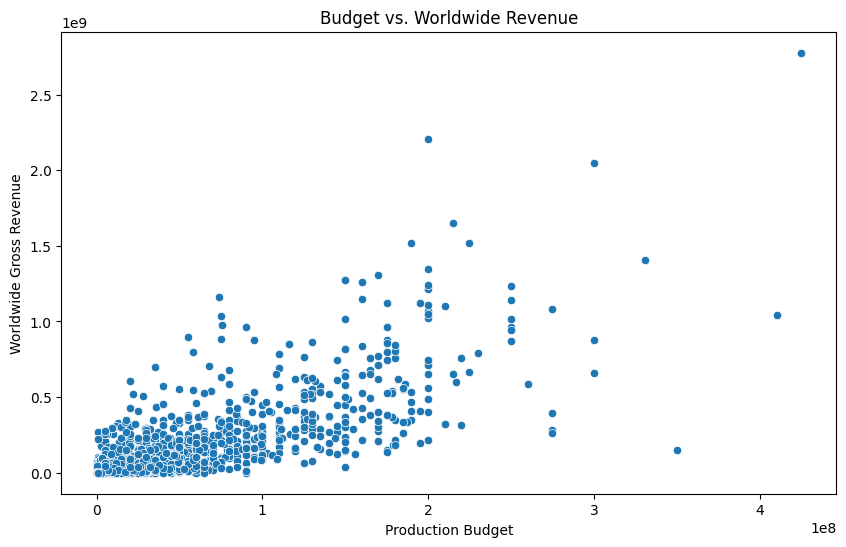

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_merged["production_budget"], y=movies_merged["worldwide_gross"])
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Budget vs. Worldwide Revenue")
plt.show()

Distribution of Profitable vs. Non-profitable Movies

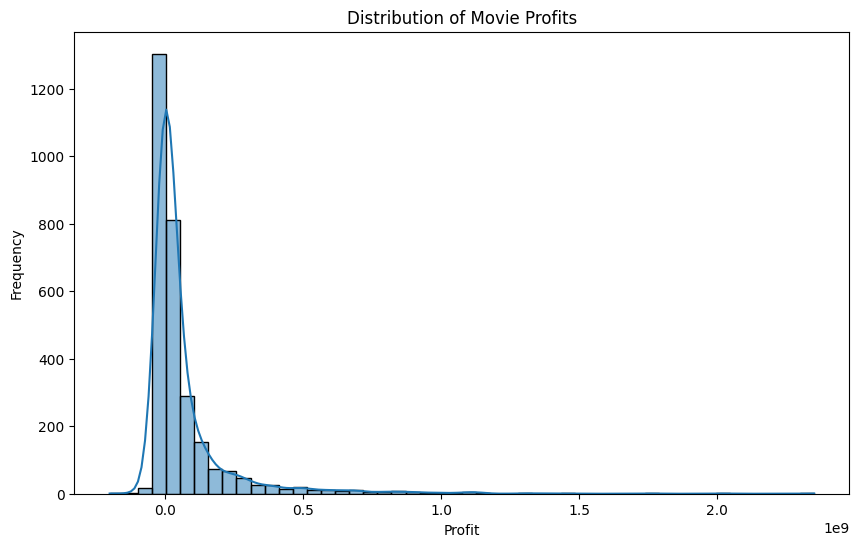

In [20]:
movies_merged["profit"] = movies_merged["worldwide_gross"] - movies_merged["production_budget"]

plt.figure(figsize=(10, 6))
sns.histplot(movies_merged["profit"], bins=50, kde=True)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Profits")
plt.show()


Top 10 Most Profitable Movies

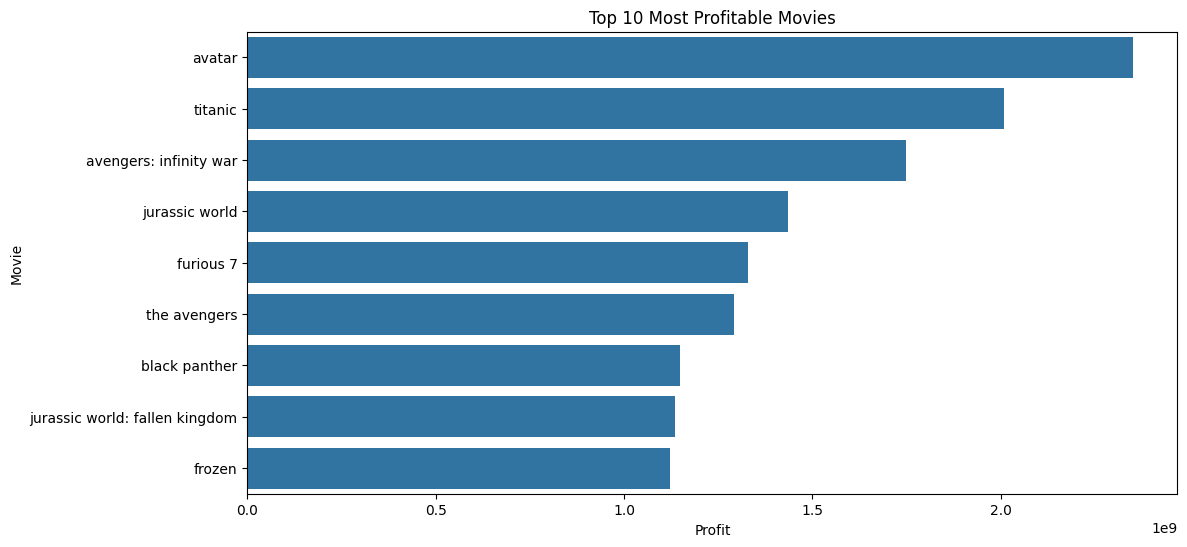

In [21]:
df_top_profitable = movies_merged.sort_values(by="profit", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_profitable["profit"], y=df_top_profitable["primary_title"])
plt.xlabel("Profit")
plt.ylabel("Movie")
plt.title("Top 10 Most Profitable Movies")
plt.show()

# Statistical Analysis

## 🎬 T-Test: Research Question  
**Does a movie's production budget significantly impact its worldwide gross earnings?**  

---

## 🧐 Hypothesis  

### **Null Hypothesis (H₀)**  
There is **no significant difference** in worldwide gross earnings between high-budget and low-budget movies.  

### **Alternative Hypothesis (H₁)**  
There **is** a significant difference in worldwide gross earnings between high-budget and low-budget movies.  

---

## 🔢 Mathematical Representation  

- **H₀** : μ<sub>high budget</sub> = μ<sub>low budget</sub>  
- **H₁** : μ<sub>high budget</sub> ≠ μ<sub>low budget</sub>  


## Assumption Testing
Checking if the assumptions hold before running the t-test  
i) **Normality Assumption**  
A t-test assumes the data is approximately normally distributed. We can check this using a histogram and the Shapiro-Wilk test:

In [22]:
from scipy.stats import shapiro
# Define high and low-budget categories based on median production budget.
median_budget = movies_merged ["production_budget"].median()
high_budget = movies_merged[movies_merged["production_budget"] >= median_budget]["worldwide_gross"]
low_budget = movies_merged[movies_merged["production_budget"] < median_budget]["worldwide_gross"]
# Check normality
shapiro_high = shapiro(high_budget.sample(500, random_state=42))  # Sample to avoid errors in large datasets
shapiro_low = shapiro(low_budget.sample(500, random_state=42))

print(f"Shapiro-Wilk Test for High-Budget Movies: W={shapiro_high.statistic}, p={shapiro_high.pvalue}")
print(f"Shapiro-Wilk Test for Low-Budget Movies: W={shapiro_low.statistic}, p={shapiro_low.pvalue}")


Shapiro-Wilk Test for High-Budget Movies: W=0.6766776607199281, p=9.018158253462238e-30
Shapiro-Wilk Test for Low-Budget Movies: W=0.5320897734881468, p=2.520775771670561e-34


## 📊 Normality Test Results  

### 🎥 High-Budget Movies  
✅ The p-value is **far below** the standard significance level (𝛼 = 0.05).  
❌ **We reject the null hypothesis.**  
🔍 This means that the worldwide gross earnings of high-budget movies **do not follow** a normal distribution.  

---

### 🎬 Low-Budget Movies  
✅ The p-value is **much smaller** than 0.05.  
❌ **We reject the null hypothesis.**  
🔍 This indicates that the worldwide gross earnings of low-budget movies **are also not normally distributed.**  



## 📏 Homogeneity of Variance (Levene’s Test)  

A standard t-test assumes **equal variances** in both groups.  
Since we used `equal_var=False`, we are conducting **Welch’s t-test**, which **does not** assume equal variance.  

However, we can still check for homogeneity of variance using **Levene’s test** to confirm this assumption.  

In [23]:
from scipy.stats import levene

levene_test = levene(high_budget, low_budget)
print(f"Levene's Test: W={levene_test.statistic}, p={levene_test.pvalue}")


Levene's Test: W=398.81331294206433, p=2.6919978396394626e-83


Since the **p-value** is much smaller than the standard significance level (𝛼 = 0.05),  
we **reject the null hypothesis**.  

This indicates that the **variances of worldwide gross earnings** for high-budget and low-budget movies are **significantly different**.  

### 📊 Boxplot for Budget Categories  

This boxplot visualizes the **spread of revenue** for **high-budget** vs. **low-budget** movies,  
helping us compare their distribution and identify potential outliers.

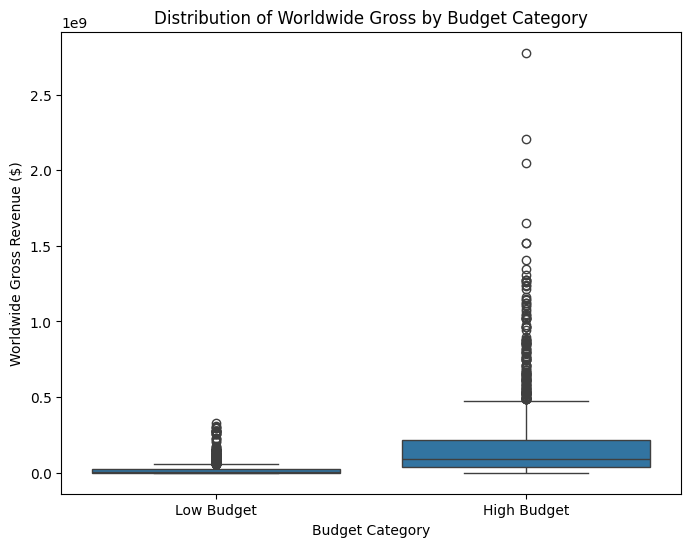

In [24]:
movies_merged["budget_category"] = movies_merged["production_budget"] >= median_budget
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_merged["budget_category"], y=movies_merged["worldwide_gross"])
plt.xticks([0, 1], ["Low Budget", "High Budget"])
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xlabel("Budget Category")
plt.title("Distribution of Worldwide Gross by Budget Category")
plt.show()


**Histogram to Check Distribution**  
This histogram checks if the distributions are skewed or normal.

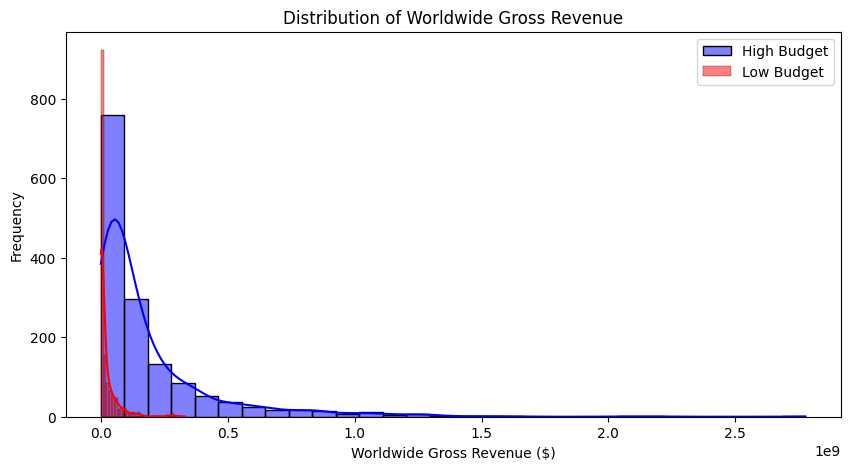

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(high_budget, bins=30, color='blue', kde=True, label="High Budget")
sns.histplot(low_budget, bins=30, color='red', kde=True, label="Low Budget")
plt.legend()
plt.title("Distribution of Worldwide Gross Revenue")
plt.xlabel("Worldwide Gross Revenue ($)")
plt.ylabel("Frequency")
plt.show()


## Conducting the T-test

In [26]:

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 23.42619480139915, P-Value: 3.549238756807619e-104


## 🏆 Result Interpretation  

Since **p-value ≈ 0** is far below the standard significance level (𝛼 = 0.05),  
we **reject the null hypothesis** and conclude that there is a **statistically significant difference**  
in worldwide gross revenue between **high-budget** and **low-budget** movies.  

From the visualizations, we observe that **high-budget movies tend to generate significantly more revenue**.  

---

## 💡 Business Recommendation  

✔️ The data suggests that **higher production budgets** generally lead to **higher worldwide earnings**.  
✔️ However, **budget alone isn't the only factor**—other elements like **genre, star power, and marketing strategies**  
should also be considered for **maximizing revenue potential**.  


## 🎬 Regression Analysis: Research Question  

**What factors influence a movie's worldwide box office gross revenue?**  

---

## 📌 Hypothesis  

**Null Hypothesis (𝐻0):**  
There is **no significant relationship** between a movie's worldwide gross revenue and its predictors:  
- **Production budget**  
- **Average rating**  
- **Number of votes**  
- **Runtime**  
- **Release year**  

**Alternative Hypothesis (𝐻𝐴):**  
At least **one** of these predictors has a **significant impact** on a movie's worldwide gross revenue.  

## ✅ Assumption Testing  

Before running the regression, we must check whether the assumptions of **linear regression** hold:  

1️⃣ **Linearity**  
- The relationship between **production budget** and **worldwide gross revenue** should be **linear**.  

2️⃣ **Normality of Residuals**  
- The residuals (errors) should follow a **normal distribution**.  

3️⃣ **Homoscedasticity**  
- The residuals should have **constant variance** (no visible patterns in residual plots).  

4️⃣ **Independence**  
- Observations should be **independent** (no duplicate entries or autocorrelation).  

📊 **How we check these assumptions:**  
We use **scatter plots, histograms, and residual plots** to visually inspect whether these conditions are met.  

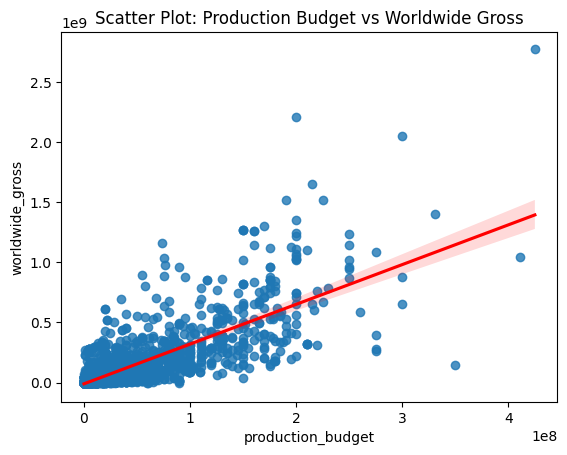

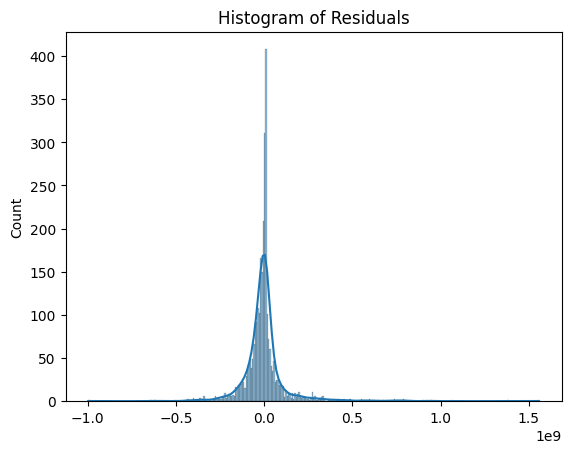

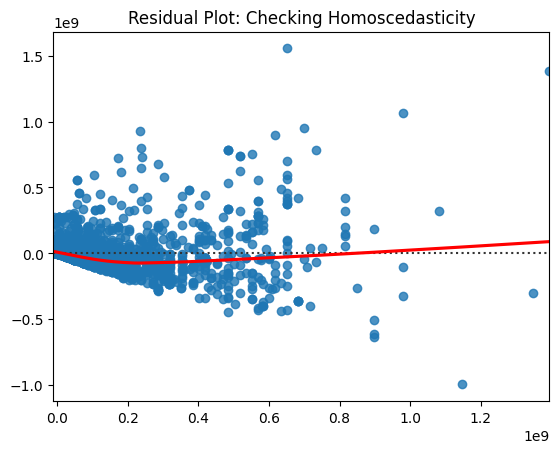

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     4489.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:50:52   Log-Likelihood:                -58933.
No. Observations:                2935   AIC:                         1.179e+05
Df Residuals:                    2933   BIC:                         1.179e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.095e+07   2.89e+0

In [27]:
# Load Data
X = movies_merged["production_budget"]
y = movies_merged["worldwide_gross"]

# Add Constant for Regression
X = sm.add_constant(X)

# Fit Linear Regression Model
model = sm.OLS(y, X).fit()

# Check Assumptions
# 1. Scatter Plot for Linearity
sns.regplot(x=movies_merged["production_budget"], y=movies_merged["worldwide_gross"], line_kws={"color": "red"})
plt.title("Scatter Plot: Production Budget vs Worldwide Gross")
plt.show()

# 2. Histogram for Residual Normality
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# 3. Residuals vs Fitted Values for Homoscedasticity
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot: Checking Homoscedasticity")
plt.show()

# 4. Summary Statistics for Residuals
print(model.summary())


## 📊 Interpretation of the OLS Regression Results  

🔹 **R-squared (0.560)**  
- **56%** of the variance in **worldwide gross revenue** is explained by **production budget**.  
- The remaining **44%** suggests that other factors also influence a movie’s revenue.  

🔹 **F-statistic (7355) & Prob (F-statistic) = 0.00**  
- A **high F-statistic** and a **p-value of 0.00** indicate that the model is **statistically significant**.  
- This means **production budget** is a **meaningful predictor** of worldwide gross revenue.  

🔹 **Intercept (const = -7.286e+06, p = 0.000)**  
- If a movie had a **production budget of zero**, the expected worldwide gross would be **~$7.29 million (negative)**.  
- This is likely due to model limitations, as real-world factors like marketing and distribution play a role.  

🔹 **Production Budget (coef = 3.1269, p = 0.000)**  
- For **every $1 increase** in production budget, worldwide gross revenue is expected to **increase by ~$3.13**.  
- The **p-value (0.000)** confirms this predictor is **highly significant**.  

🔹 **Key Takeaways**  
✅ Higher-budget movies tend to generate **more revenue**.  
✅ **Only 56%** of the revenue variation is explained by the model.  
✅ Other factors like **genre, star power, marketing, and release strategy** likely impact revenue.  

📌 **Next Steps:** Consider adding more predictors to improve the model’s explanatory power! 🚀  

In [28]:
# Define independent variables (predictors)
predictors = ["production_budget", "averagerating", "numvotes", "runtime_minutes", "start_year"]

# Drop missing values for a clean regression model
df_final_clean = movies_merged.dropna(subset=["worldwide_gross"] + predictors)

# Define X and y
X = df_final_clean[predictors]
y = df_final_clean["worldwide_gross"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1094.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:50:52   Log-Likelihood:                -56323.
No. Observations:                2816   AIC:                         1.127e+05
Df Residuals:                    2810   BIC:                         1.127e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -7.17e+09   1.78e+0

## 📊 Interpretation of the OLS Regression Results  

🔹 **Model Performance**  
- **R-squared (0.517):** The model explains **51.7%** of the variance in worldwide gross revenue.  
- **48.3%** of the variation remains **unexplained**, suggesting other factors influence box office earnings.  

🔹 **Model Significance**  
- **F-statistic (627.1) & p-value (0.000):**  
  - The model is **statistically significant**—at least one predictor has a **meaningful impact** on worldwide gross.  

🔹 **Key Predictor Insights**  

📌 **Statistically Significant Predictors**  
✅ **Production Budget (coef = 3.5053, p = 0.000)**  
   - A **$1 increase** in production budget **increases worldwide gross by ~$3.51**.  
   - **Highly significant**, confirming a **strong positive impact**.  
✅ **Start Year (coef = 6.619e+06, p = 0.000)**  
   - **Newer movies** tend to earn **more revenue**, likely due to **inflation & evolving market trends**.  
   - **Strong statistical significance** (p < 0.05). 

⚠️ **Non-Significant Predictors (p > 0.05)**  
❌ **Average Rating (coef = -2.67e+06, p = 0.293):**  
   - Film ratings **do not significantly** impact worldwide gross in this model.  
❌ **Number of Votes (coef = 32.39, p = 0.179):**  
   - Higher vote counts **do not reliably** predict worldwide earnings.  
❌ **Runtime Minutes (coef = -1.32e+05, p = 0.384):**  
   - Longer movies **do not** strongly influence box office success.  

🔹 **Intercept (const = -1.334e+10, p = 0.000)**  
- If a movie had a **production budget of zero**, its expected worldwide gross would be **-13.34 billion** (which is not realistic, likely due to model limitations).  

🔹 **Key Takeaways**  
✅ **Production budget** is the **strongest predictor** of box office earnings.  
✅ **Start year** is also significant—newer films tend to earn more.  
❌ **Average rating, number of votes, and runtime** do not significantly affect revenue.  

📌 **Next Steps for Model Improvement**  
🔹 **Check for multicollinearity** to ensure predictors are independent.  
🔹 **Normalize residuals** to improve model accuracy.  
🔹 Consider adding **marketing spend, genre, and star power** as additional predictors.  

🚀 **Further refinements could enhance predictive power!**


# Conclusion and Recommendations

High-budget movies tend to generate higher revenue (T-test).

Production budget is a strong predictor of revenue (Regression).

The company should prioritize films with larger budgets but ensure cost efficiency.

Identify profitable genres and release timing for better success.
